# What Affects Lenders' Contribution to Peer-to-peer Lending?  -- An Exploration on the Antecedants.
## by Jinyan Xiang

## Investigation Overview

In this investigation, I focused on exploring the antecedants of lenders' average lending amount for each listing, which is a proxy of lenders' contribution to the peer-to-peer lending, and more broadly, their engagement in the sharing economy. 

## Dataset Overview

To explore the antecedants of lenders' average lending amount, I retrieved loan listing data from Prosper -- a leading p2p lending platform in the US. 

After excluding duplicated listings and extreme outliers, and listings that are not fully funded, the dataset for further analysis contains 112,196 unique fully-funded Prosper loan listings created and funded between November 2005 and March 2014 in 51 US states and Washington DC.

## The Outcome Variable

The focal outcome variable in this investigation is Average Lending Amount, which is calculated as Loan Original Amount divided by the number of Investors. It is a proxy of lender's contribution to the p2p lending and more broadly, engagement in the sharing economy, which is a  crucial metric that both sharing economy platforms and policymakers are interested in.

## Focal Predictors

I explored these antecedants of lenders' average lending amount from three aspects -- borrowers', lenders' and loans', specifically,

1. borrower's Prosper Score -- an integrated metric of the borrower's credibility (range from 1 to 11, incremental by 1, the higher ,the more credible and less risky, the greater average lending amount)
2. borrower's Stated Monthly Income-- an indicator of the borrowe's payment ability (the higher, the stronger payment ability and less riksy, the greater average lending amount)
2. lender's Yield -- an indicator of expected ROI in the lending (the higher, the better ROI, the greater average lending amount)
3. loan's Term -- a determinant of ROI rate (could be complicated based on the formula)

In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [3]:
# load in the dataset into a pandas dataframe (saved in Part 1 - preliminarily cleaned)
df = pd.read_csv('df_exp2.csv')

In [4]:
#set up the graph theme
sns.set_theme(style="white", palette="pastel")

## Distribution of the Outcome Variable (Average Lending) 

Average lending amount has a wide range (i.e., from to 7 to 25000) with a mean of 2723 and a standard deviation of 5396. 
It is necessary to take log transformation of the variable to address the strong left skewness.

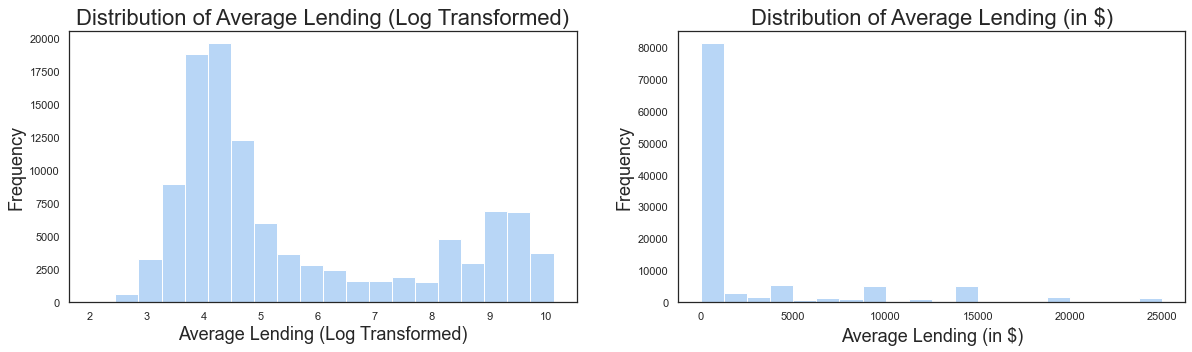

In [5]:
fig, ax = plt.subplots(ncols = 2, figsize = [20,5])

sns.histplot(data = df, x = 'AverageLending_log' ,bins =20, ax = ax[0])
sns.histplot(data = df, x = 'AverageLending' ,bins =20, ax = ax[1])

ax[0].set_title('Distribution of Average Lending (Log Transformed)',fontsize = 22)
ax[1].set_title('Distribution of Average Lending (in $)',fontsize = 22)

ax[0].set_xlabel('Average Lending (Log Transformed)',fontsize = 18)
ax[1].set_xlabel('Average Lending (in $)',fontsize = 18)

ax[0].set_ylabel('Frequency', fontsize = 18)
ax[1].set_ylabel('Frequency', fontsize = 18)

plt.show()

## Distribution of Focal Predictors
The majority of borrowers have a monthly income ranging from 2,000 dollars to 5,000 dollars (48%) and a prosper score ranging from 4 to 8 (68%). <br>
The majority of loans have a lender's yield ranging from 0.08 to 0.2 (55%) and a term of 36 months (77%).

In [6]:
#df.query("ProsperScore >= 4 and ProsperScore <= 8").shape[0]/df.ProsperScore.describe()[0]

In [7]:
#df.query("StatedMonthlyIncome >= 2000 and StatedMonthlyIncome <= 5000").shape[0]/df.StatedMonthlyIncome.describe()[0]

In [8]:
#df.query("LenderYield >= 0.08 and LenderYield <= 0.2").shape[0]/df.LenderYield.describe()[0]

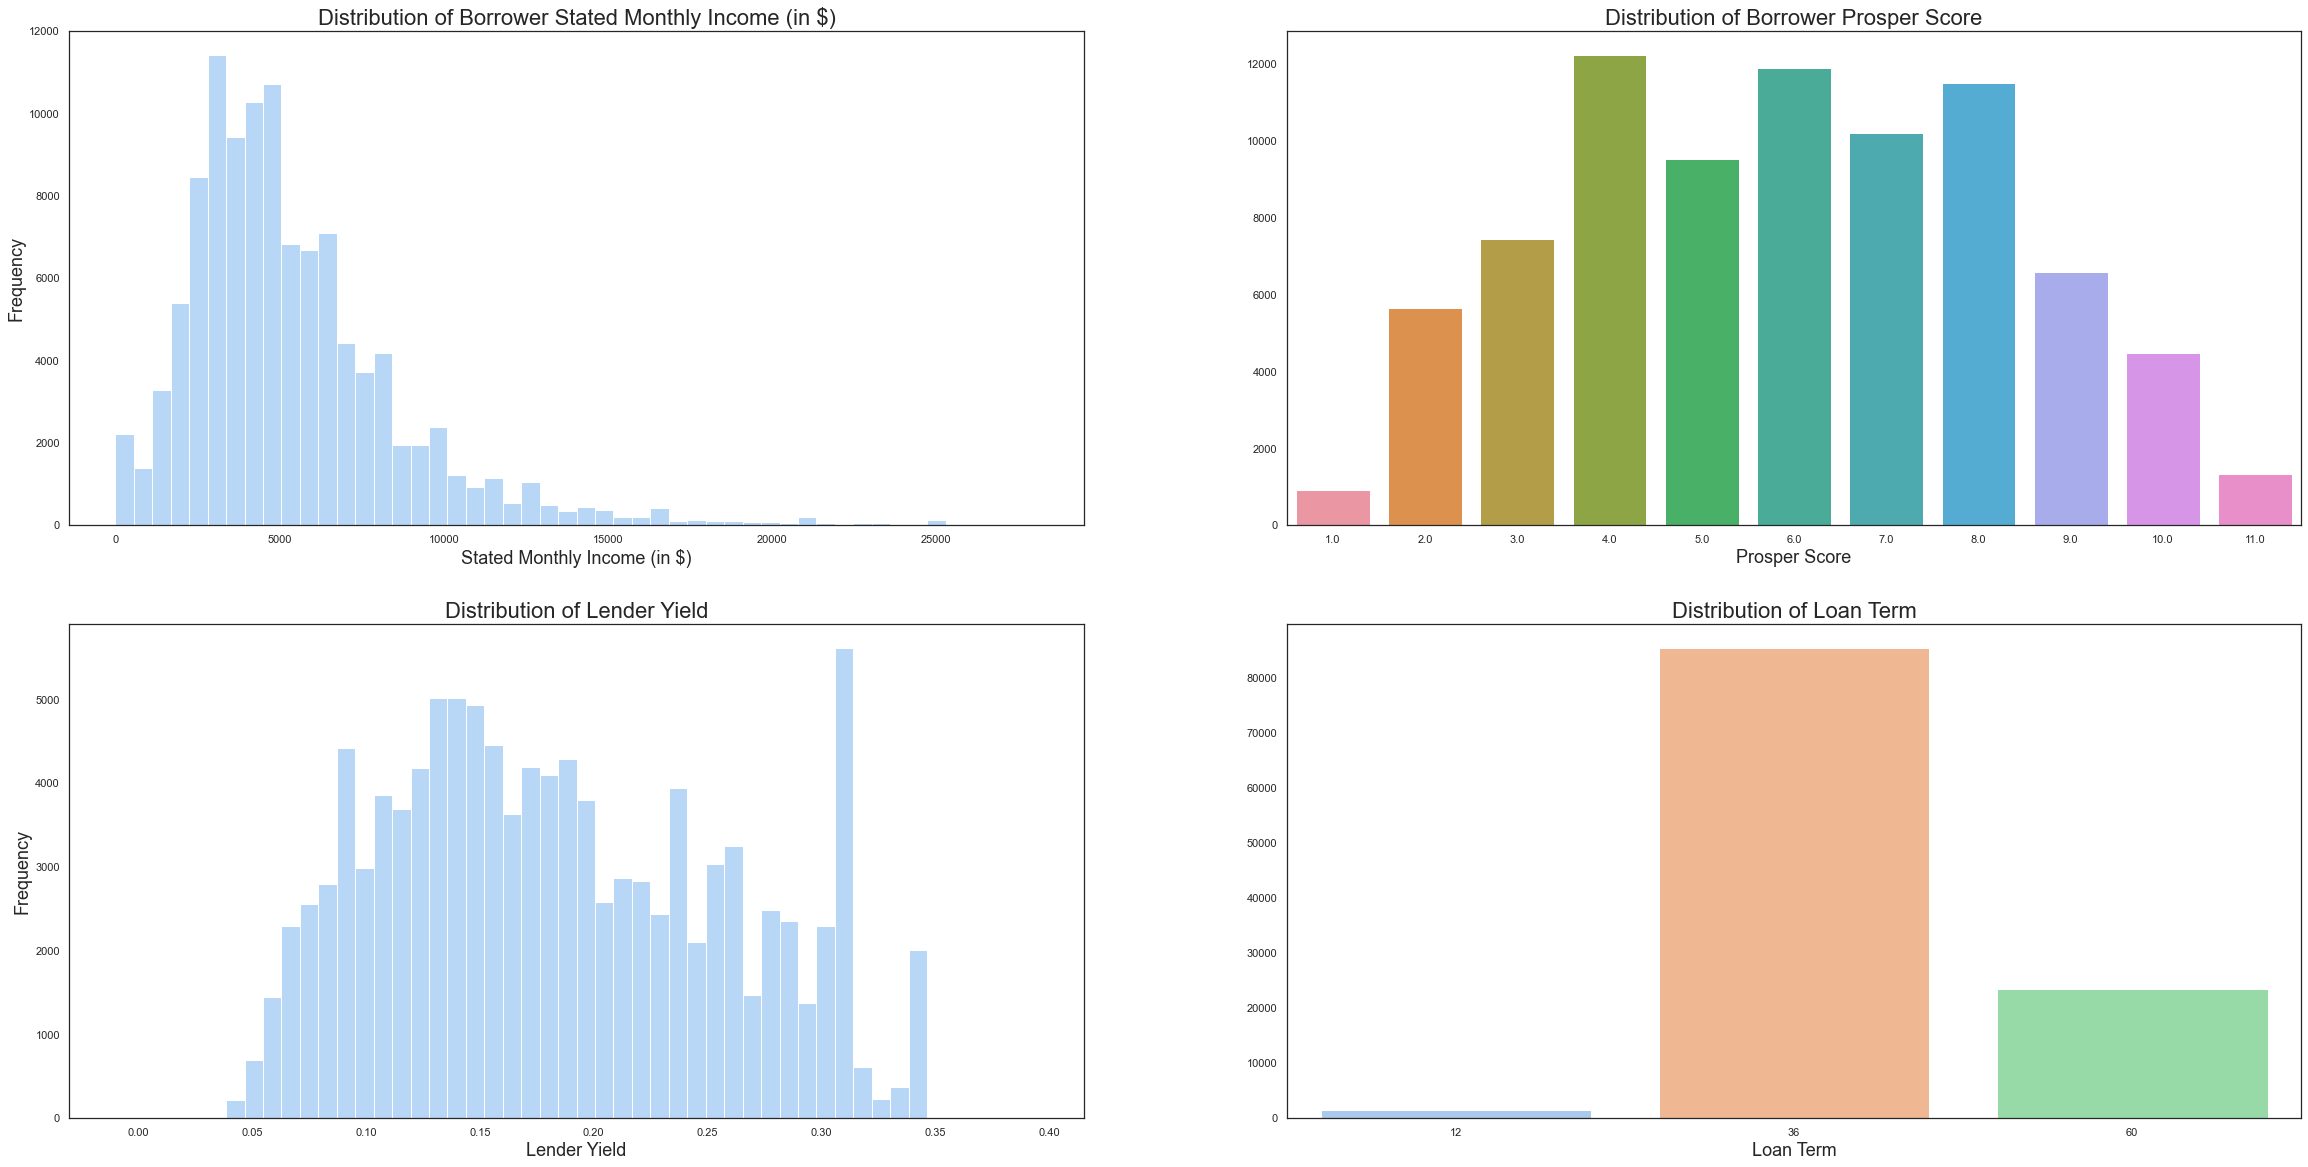

In [9]:
fig, ax = plt.subplots(ncols = 2, nrows = 2, figsize = [40,20])

sns.histplot(data = df, x = 'StatedMonthlyIncome' ,bins =50, ax = ax[0,0])

df_temp1 = df['ProsperScore'].value_counts().rename_axis('ProsperScore').reset_index(name = 'Counts').sort_values(by = 'ProsperScore')
sns.barplot(data = df_temp1, x = 'ProsperScore', y = 'Counts',ax = ax[0,1])

sns.histplot(data = df, x = 'LenderYield',bins =50, ax = ax[1,0])

df_temp2 = df['Term'].value_counts().rename_axis('Term').reset_index(name = 'Counts').sort_values(by = 'Term')
sns.barplot(data = df_temp2, x = 'Term', y = 'Counts',ax = ax[1,1])

ax[0,0].set_title('Distribution of Borrower Stated Monthly Income (in $)',fontsize = 22)
ax[0,1].set_title('Distribution of Borrower Prosper Score',fontsize = 22)
ax[1,0].set_title('Distribution of Lender Yield',fontsize = 22)
ax[1,1].set_title('Distribution of Loan Term',fontsize = 22)

ax[0,0].set_xlabel('Stated Monthly Income (in $)',fontsize = 18)
ax[0,1].set_xlabel('Prosper Score',fontsize = 18)
ax[1,0].set_xlabel('Lender Yield',fontsize = 18)
ax[1,1].set_xlabel('Loan Term',fontsize = 18)

ax[0,0].set_ylabel('Frequency', fontsize = 18)
ax[0,1].set_ylabel('')
ax[1,0].set_ylabel('Frequency', fontsize = 18)
ax[1,1].set_ylabel('')


plt.show()

## Correlation Plots: Average Lending vs. Stated Monthly Income, Prosper Score, Lender Yield
Stated monthly income, prosper score and lender yield have a positive, negative and negligible correlation with average lending amount.<br>
<br>
##### Note: 
###### 1. Average lending amount is log transformed to address skewness.
###### 2. Prosper Score is treated as countinous (vs. essentially discrete) for exploration purpose.

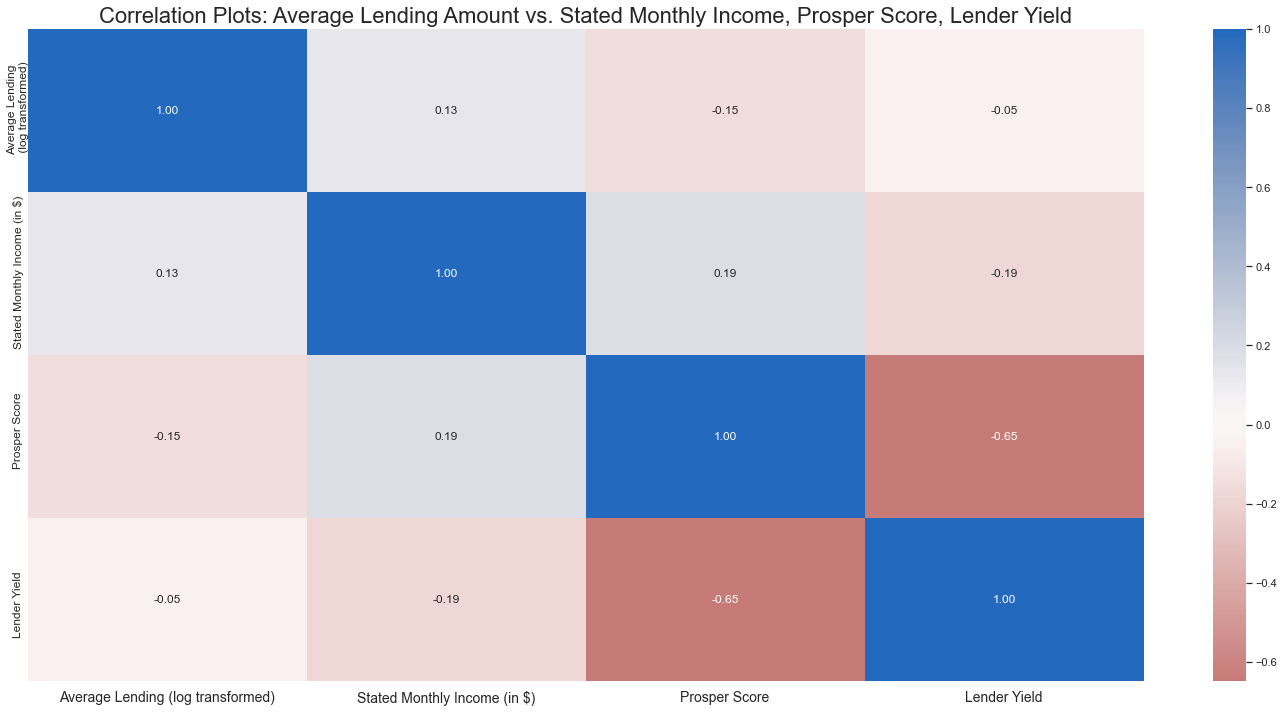

In [38]:
plt.figure(figsize = [25,12])
plt.title("Correlation Plots: Average Lending Amount vs. Stated Monthly Income, Prosper Score, Lender Yield", fontsize = 22)

sns.heatmap(df[['AverageLending_log','StatedMonthlyIncome','ProsperScore','LenderYield']].corr(), annot = True, fmt = '.2f',
           cmap = 'vlag_r', center = 0)

plt.xticks([0.5,1.5,2.5,3.5],['Average Lending (log transformed)','Stated Monthly Income (in $)','Prosper Score','Lender Yield'],fontsize = 14)
plt.yticks([0.25,1.05,2.25,3.35],['Average Lending \n (log transformed)','Stated Monthly Income (in $)' ,'Prosper Score','Lender Yield'],fontsize = 12, ha = 'center')

plt.show()

## Scatter Plots: Average Lending vs. Stated Monthly Income, Prosper Score, Lender Yield
The positive, negative and negligible relationships between tated monthly income, prosper score and lender yield and average lending amount are further confirmed.<br>
##### Note:
###### 1. Average lending amount is log transformed to address skewness.
###### 2. Prosper Score here is treated as countinous (vs. essentially discrete) for exploration purpose.
###### 3. A random sample of 1,000 listings is used for a neater visualization.

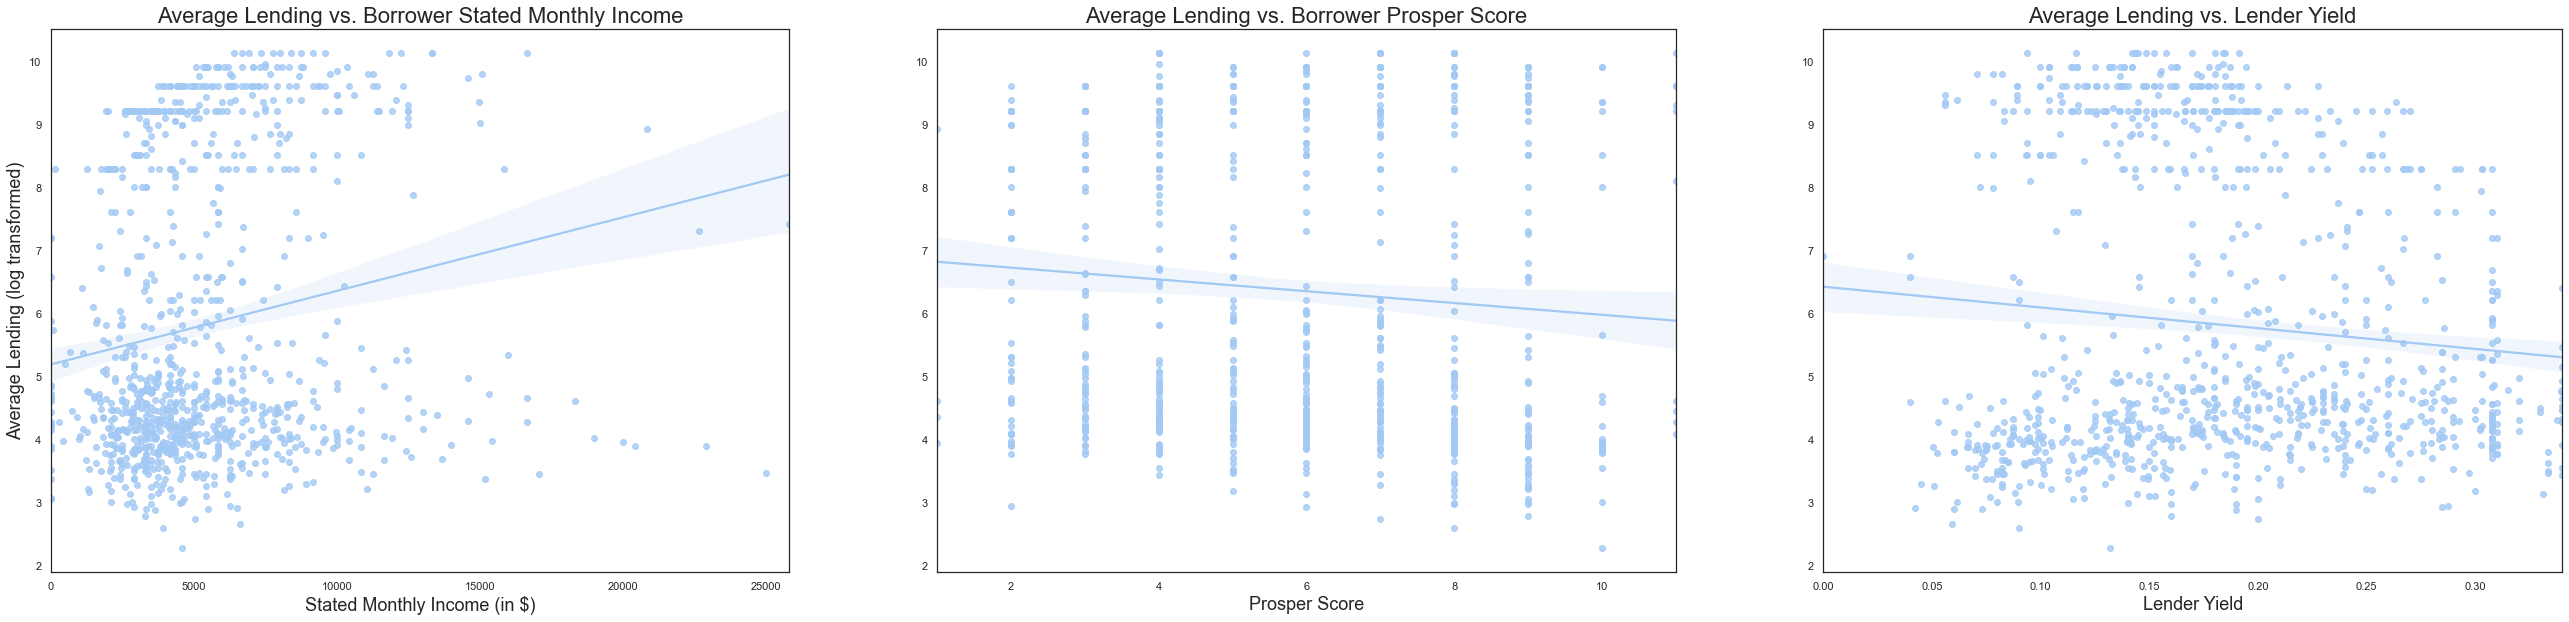

In [14]:
fig, ax = plt.subplots(ncols = 3, figsize = [45,10])

df_sample = df.sample(n=1000, replace = False)

sns.regplot(data = df_sample, x = 'StatedMonthlyIncome', y = 'AverageLending_log', ax = ax[0])
sns.regplot(data = df_sample, x = 'ProsperScore', y = 'AverageLending_log', ax = ax[1])
sns.regplot(data = df_sample, x = 'LenderYield', y = 'AverageLending_log', ax = ax[2])
#sns.histplot(data = df, y = 'AverageLending' ,bins =20, ax = ax[1])

ax[0].set_title('Average Lending vs. Borrower Stated Monthly Income',fontsize = 22)
ax[1].set_title('Average Lending vs. Borrower Prosper Score',fontsize = 22)
ax[2].set_title('Average Lending vs. Lender Yield',fontsize = 22)

ax[0].set_xlabel('Stated Monthly Income (in $)',fontsize = 18)
ax[1].set_xlabel('Prosper Score',fontsize = 18)
ax[2].set_xlabel('Lender Yield',fontsize = 18)

ax[0].set_ylabel('Average Lending (log transformed)', fontsize = 18)
ax[1].set_ylabel('')
ax[2].set_ylabel('')

plt.show()

## Bar Plots: Average Lending vs. Stated Monthly Income, Prosper Score, Lender Yield
* Treating <i> Prosper Score </i> as a discrete variable reveals more nuanced relationship between it and average lending amount: there is a positive relationship when prosper score is relative low (1-4) and almost no relationship when it is in the middle (5-7) and regain a general positive relationship when it is high (8-11).<br>
* The longer loan's term, the more average lending amount for the listing. <br>
<br>

##### Note: 
###### 1. Average lending amount is log transformed to address skewness.

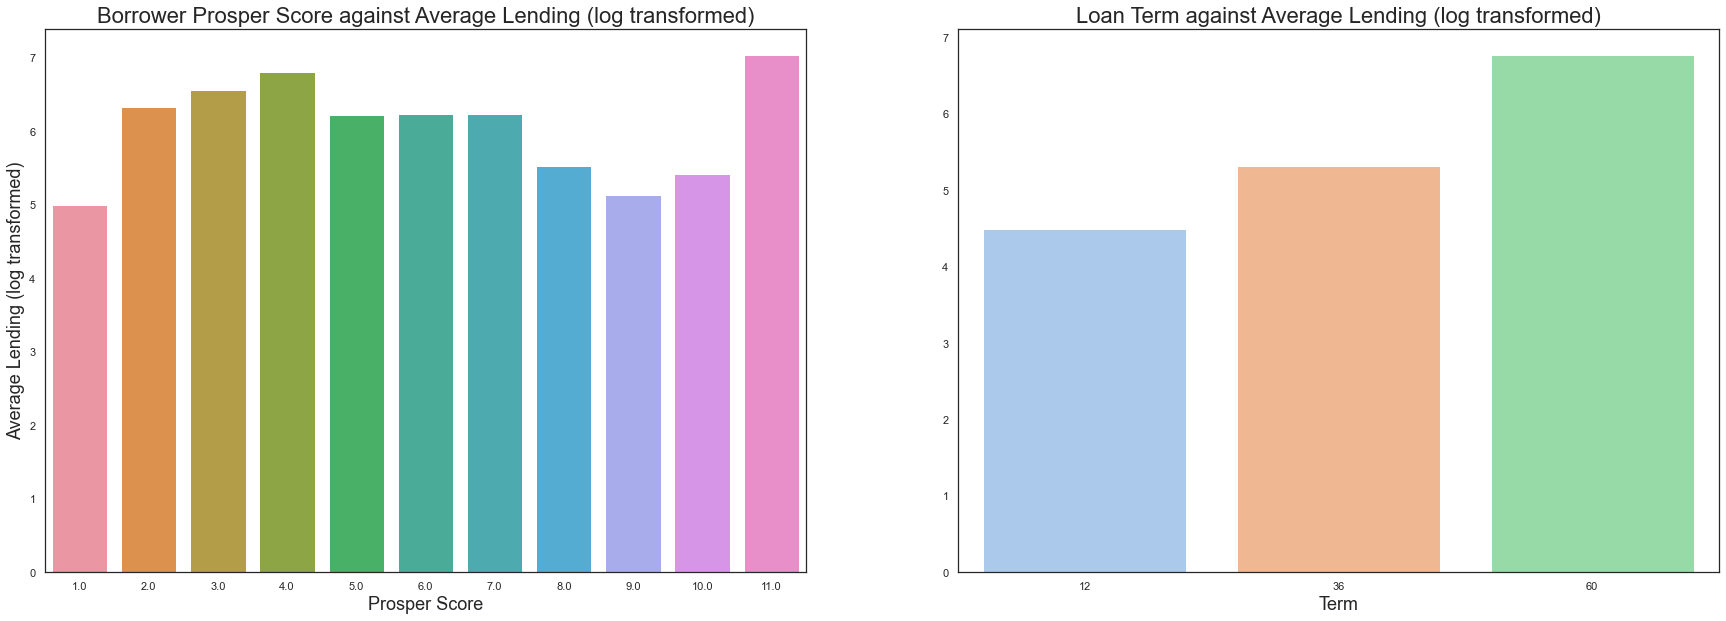

In [11]:
fig, ax = plt.subplots(ncols = 2, figsize = [30,10])


sns.barplot(data = df, x = 'ProsperScore', y = 'AverageLending_log', ci =None, ax = ax[0])
sns.barplot(data = df, x = 'Term', y = 'AverageLending_log', ci =None, ax = ax[1])

ax[0].set_title('Borrower Prosper Score against Average Lending (log transformed)',fontsize = 22)
ax[1].set_title('Loan Term against Average Lending (log transformed)',fontsize = 22)


ax[0].set_xlabel('Prosper Score',fontsize = 18)
ax[1].set_xlabel('Term',fontsize = 18)

ax[0].set_ylabel('Average Lending (log transformed)', fontsize = 18)
ax[1].set_ylabel('')


plt.show()

## Interaction between Prosper Score and Stated Monthly Income on Average Lending
There is a significant interaction between borrower's prosper score and their stated monthly income. Specifically, borrower's stated monthly income  a stronger positive impact on average lending amount when the borrower has a high (vs. med) prosper score. <br>
<br>
##### Note:
###### 1. Prosper score is categoried into three levels based on its original value: low (1-4), med (5-7), high (8-11).
###### 2. Listings without prosper score is excluded for a neater virsualization.
###### 3. Average lending amount is log transformed to address skewness.
###### 4. A random sample of 1000 listings is used for a neater visualization.

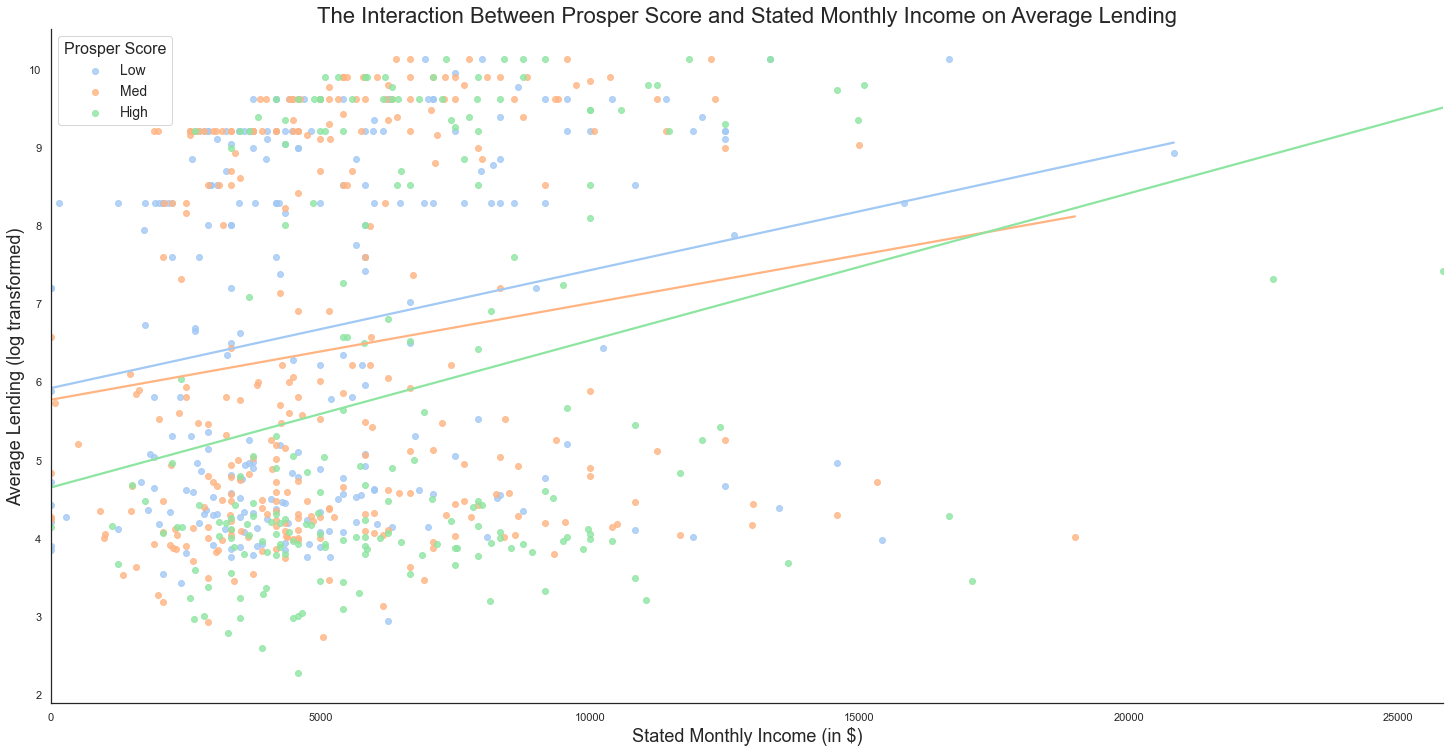

In [15]:
sns.lmplot(data = df_sample.query('ProsperScore_coded != "NA"'), x = 'StatedMonthlyIncome', y = 'AverageLending_log', hue = 'ProsperScore_coded' ,
           robust = True, ci = None, legend = False, 
           height=10, aspect=2)

plt.title('The Interaction Between Prosper Score and Stated Monthly Income on Average Lending', fontsize = 22)

#add labels and lengends
plt.xlabel('Stated Monthly Income (in $)',fontsize = 18)
plt.ylabel('Average Lending (log transformed)',fontsize = 18)
plt.legend(title = 'Prosper Score', fontsize = 14, title_fontsize = 16)

plt.show()

## Interaction between Prosper Score and Lender Yield on Average Lending
There is a significant interaction between borrower's prosper score and lender yield. Specifically, lender yield has a negative effect on average lending amount when borrowers have low and med prosper scores, and such negative effects diminish when borrowers have high prosper score. <br>
<br>
##### Note:
###### 1. Prosper score is categoried into three levels based on its original value: low (1-4), med (5-7), high (8-11).
###### 2. Listings without prosper score is excluded for a neater virsualization.
###### 3. Average lending amount is log transformed to address skewness.
###### 4. A random sample of 1000 listings is used for a neater visualization.

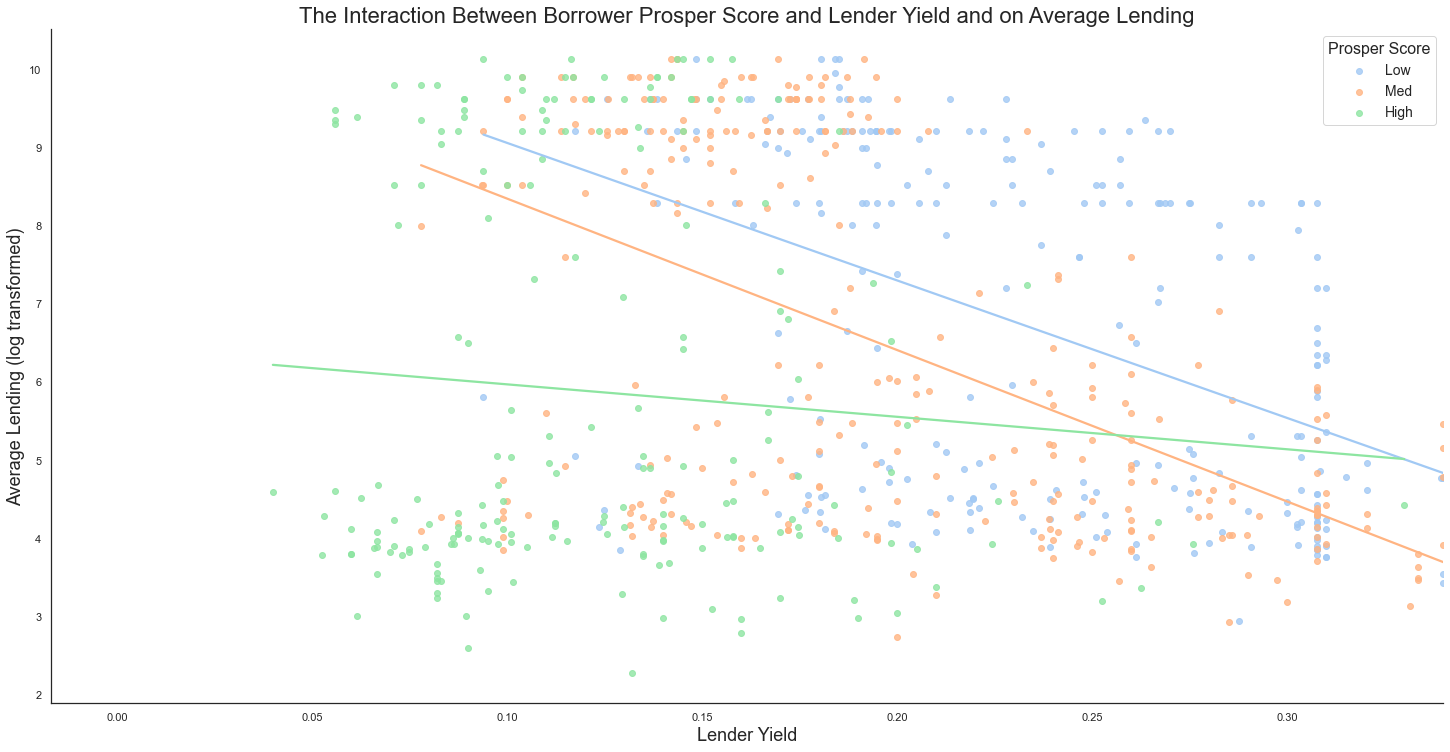

In [16]:
sns.lmplot(data = df_sample.query('ProsperScore_coded != "NA"'), x = 'LenderYield', y = 'AverageLending_log', hue = 'ProsperScore_coded' ,
           ci = None, robust = True, legend = False,
           height=10, aspect=2)

plt.title('The Interaction Between Borrower Prosper Score and Lender Yield and on Average Lending', fontsize = 22)

#add labels and lengends
plt.xlabel('Lender Yield',fontsize = 18)
plt.ylabel('Average Lending (log transformed)',fontsize = 18)
plt.legend(title = 'Prosper Score', fontsize = 14, title_fontsize = 16)

plt.show()

## Interaction between Prosper Score and Lender Yield on Average Lending
There is a significant interaction between loan term and lender yield. Specifically, lender yield has a negative effect on average lending amount when the term is 60 months, and such negative effect diminish when the loan term is 12 months or 36 months. <br>
<br>
##### Note:
###### 1. Average lending amount is log transformed to address skewness.
###### 2. A random sample of 1000 listings is used for a neater visualization.

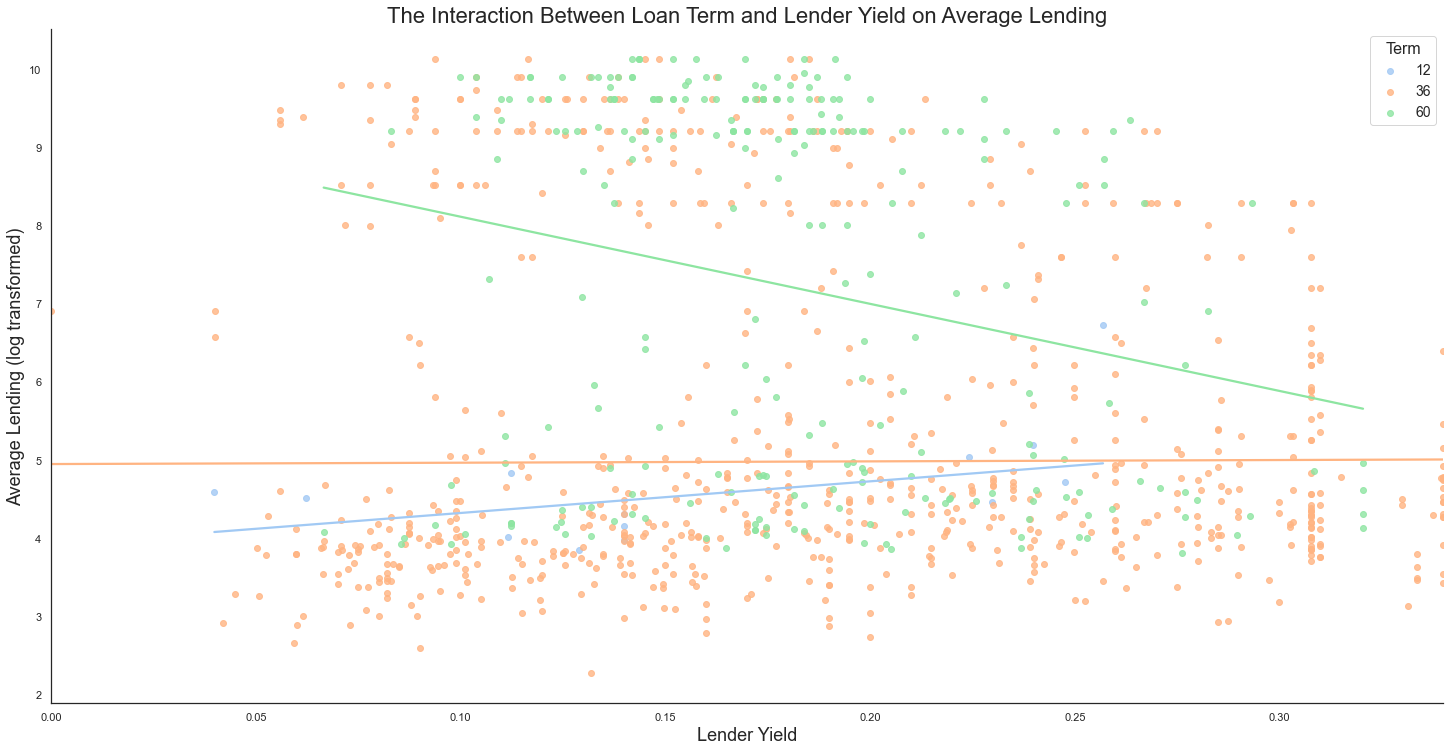

In [17]:
sns.lmplot(data = df_sample, x = 'LenderYield', y = 'AverageLending_log', hue = 'Term' ,
           ci = None, robust = True, legend = False,
           height=10, aspect=2)

plt.title('The Interaction Between Loan Term and Lender Yield on Average Lending', fontsize = 22)

#add labels and lengends
plt.xlabel('Lender Yield',fontsize = 18)
plt.ylabel('Average Lending (log transformed)',fontsize = 18)
plt.legend(title = 'Term', fontsize = 14, title_fontsize = 16)

plt.show()

## THANK YOU :)

### contact me @ yan471025@gmail.com

In [ ]:
!jupyter nbconvert Part_II_slide_deck_Prosper_JX.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook Part_II_slide_deck_Prosper_JX.ipynb to slides
[NbConvertApp] Writing 1457135 bytes to Part_II_slide_deck_Prosper_JX.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Serving your slides at http://127.0.0.1:8000/Part_II_slide_deck_Prosper_JX.slides.html
Use Control-C to stop this server


> This should open a tab in your web browser where you can scroll through your presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent slide. Make sure you remove all of the quote-formatted guide notes like this one before you finish your presentation! At last, you can stop the Kernel. 